### Dataset & Tools & Technologies

This dataset contains restaurant information in the state of California, US. The dataset will then be transformed, processed and prepared in the required format. This clean dataset will then be used to answer some analytical questions and create a few data visualizations in Python.

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- You may use any of [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/python/) packages for data visualization.
- We will be using [Jupyter notebooks](https://jupyter.org/) to run Python code in order to view and interact better with our data and visualizations.
- You are free to use [Google Colab](https://colab.research.google.com/) which provides an easy-to-use Jupyter interface.
- If not in Colab, it is recommended to run this Jupyter Notebook within an [Anaconda](https://continuum.io/) environment
- You can use any other Python packages that you deem fit for this project.

> ⚠ **Ensure that your Python version is 3.9 or higher**

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Blue_Python_3.9_Shield_Badge.svg)

**Language**

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)

**Environments & Packages**

![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white)

**Data Store**

![AWS](https://img.shields.io/badge/AWS-%23FF9900.svg?style=for-the-badge&logo=amazon-aws&logoColor=white)

---

### Read California Restaurants 

In this section, we will load the dataset from [AWS](https://googlethatforyou.com?q=amazon%20web%20services), conduct an exploratory data analysis and then clean up the dataset


- Ensure that pandas and plotly are installed (possibly via pip or poetry)
- The dataset is about 300 MB in size and time-to-download depends on internet speed and availability
- Download the dataset using Python into this notebook and load it into a pandas dataframe (without writing to file)


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import urllib.request

CELL_HEIGHT: int = 50

# Initialize helpers to ignore pandas warnings and resize columns and cells
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

DATA_URL: str = "https://dotlas-marketing.s3.amazonaws.com/interviews/california_restaurants.json"

In [2]:
%%time

df = pd.read_json("california_restaurants.json")
df.shape

Wall time: 17.2 s


(18316, 43)

**Create a restaurant ID column to uniquely index each restaurant**


In [ ]:
df["restaurant_id"] = range(1, len(df) + 1)
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  <p>Feast on delicious grub at Jerry's Famous D...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90     4.6           136   
1                                    90     0.0             0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0            18  [Spicy, Casual, Neighborhood Gem]     []          []   
1             0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist  \
0  {'bar': False, 'counter': False, 'gifting': No...   
1  {'bar': None, 'counter': None, 'gifting': None...   

                                  safety_precautions order_online_link  \
0  {'cleanMenus': None, 'limitedSeating': None, '...              None   
1  {'cleanMenus': None, 'limitedSeating': None, '...              None   

                                     facebook  \
0  http://www.facebook.com/luv2eatthaibistro/   
1                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  
0                      NaN              1  
1                      NaN              2

### Basic Operations

#### Restaurants by City

For each city in california, find

1. the number of restaurants in that city,
2. mean `rating` of all restaurants in the city,
3. mean `price_range_id` per city,
4. mean `maximum_days_advance_for_reservation` per city

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| city          | restaurant_count | avg_rating | avg_price_range_id | avg_reservation_advance |
| :------------ | ---------------: | ---------: | -----------------: | ----------------------: |
| San Francisco |             1645 |    2.59343 |             2.3617 |                 90.3453 |
| Los Angeles   |             1604 |    2.31995 |            2.29052 |                  86.692 |
| San Diego     |             1034 |    2.65493 |            2.28723 |                 94.5783 |
| San Jose      |              372 |    1.54597 |            2.16398 |                 88.3011 |
| Sacramento    |              329 |    1.68663 |            2.26748 |                 95.0274 |


In [4]:

df1 = df.groupby("city").agg(restaurant_count=('restaurant_id', 'count'),avg_rating =('rating', np.mean),avg_price_range_id=('price_range_id', np.mean),avg_reservation_advance =('maximum_days_advance_for_reservation', np.mean))
df1 = df1.sort_values(by=['restaurant_count'], ascending=False)
df1.reset_index(inplace = True)
df1.head(5)

city  restaurant_count  avg_rating  avg_price_range_id  \
0  San Francisco              1645    2.593435            2.361702   
1    Los Angeles              1604    2.319950            2.290524   
2      San Diego              1034    2.654932            2.287234   
3       San Jose               372    1.545968            2.163978   
4     Sacramento               329    1.686626            2.267477   

   avg_reservation_advance  
0                90.345289  
1                86.692020  
2                94.578337  
3                88.301075  
4                95.027356

#### Restaurants by Brand 

For each brand (`brand_name`) in california, find

1. the number of restaurants that belong to that brand,
2. mean `price_range_id` of the brand across its restaurants

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| brand_name               | restaurant_count | avg_price_range_id |
| :----------------------- | ---------------: | -----------------: |
| Denny's                  |               73 |                  2 |
| Ihop                     |               37 |                  2 |
| Buffalo Wild Wings       |               32 |                  2 |
| Black Bear Diner         |               28 |                  2 |
| Coco's Bakery Restaurant |               24 |                  2 |


In [ ]:
df["subregion"].value_counts() 

California    18316
Name: subregion, dtype: int64

In [6]:


df2 = df.groupby("brand_name").agg(restaurant_count=('restaurant_id', 'count'),avg_price_range_id=('price_range_id', np.mean))
df2 = df2.sort_values(by=['restaurant_count'], ascending=False)
df2['avg_price_range_id']=df2['avg_price_range_id'].astype('int64')
df2.reset_index(inplace = True)
df2.head(5)

brand_name  restaurant_count  avg_price_range_id
0                   Denny's                73                   2
1                      Ihop                37                   2
2        Buffalo Wild Wings                32                   2
3          Black Bear Diner                28                   2
4  Coco's Bakery Restaurant                24                   2

#### Visualize Brands 

Create a bar chart of top 5 brands in california by average number of reviews where each brand has at least 5 restaurants


In [7]:


df3 = df.groupby("brand_name").agg(restaurant_count=('restaurant_id', 'count'),average_number_of_reviews =('review_count', np.mean))
df3 = df3.sort_values(by=['average_number_of_reviews'], ascending=False)
df3.reset_index(inplace = True)
df3.head(5)

brand_name  restaurant_count  \
0  Lawry's The Prime Rib - Beverly Hills                 1   
1                     House of Prime Rib                 1   
2                    Bottega Napa Valley                 1   
3                           Slanted Door                 1   
4                      Greens Restaurant                 1   

   average_number_of_reviews  
0                    14748.0  
1                    13003.0  
2                    10751.0  
3                    10296.0  
4                     9899.0

In [ ]:
df3 = df3.loc[df3['restaurant_count'] >= 5]
df3.head()

brand_name  restaurant_count  \
8817                            Ruby's Diner                 6   
8828                               Crepevine                 5   
8832             Amici's East Coast Pizzeria                 9   
8833                            Urban Plates                 5   
8834  Mikuni Japanese Restaurant & Sushi Bar                 5   

      average_number_of_reviews  
8817                   0.833333  
8828                   0.400000  
8832                   0.222222  
8833                   0.200000  
8834                   0.200000

<AxesSubplot:title={'center':'top 5 brands in california by average number of reviews with at least 5 restaurants'}, xlabel='average_number_of_reviews', ylabel='brand_name'>

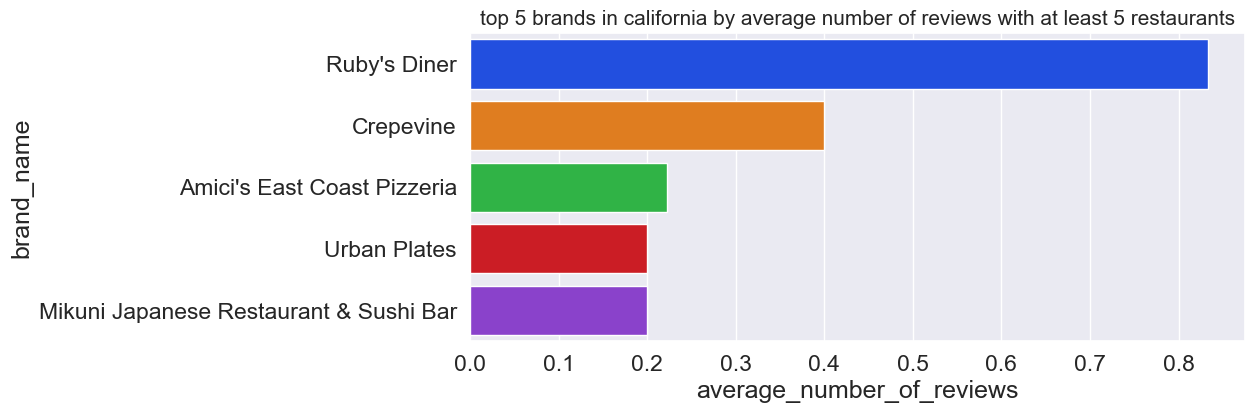

In [ ]:
plt.figure(figsize=(10,4))
sns.set(font_scale=1.5)
plt.title('top 5 brands in california by average number of reviews with at least 5 restaurants', fontsize=15)
sns.barplot(x = "average_number_of_reviews" , y = "brand_name" ,palette = 'bright',data = df3[:5])


### Transform Columns

<img src="https://media.giphy.com/media/2f41Z7bhKGvbG/giphy.gif" height="250px" width="250px" alt="harry potter">

#### Safety Precautions

Transform the entire safety precautions column into a new column based on the following rule:

Convert from dictionary to list. Only include in the list, those keys in the dictionary which are true.
For ex, for safety precautions of the type:

```python
{
    'cleanMenus': True,
    'limitedSeating': False,
    'sealedUtensils': None,
    'prohibitSickStaff': True,
    'requireDinerMasks': True,
    'staffIsVaccinated': None,
    'proofOfVaccinationRequired': False,
    'sanitizerProvidedForCustomers': None
}
```

It should turn into a list of the form:

```python
["Clean Menus", "Prohibit Sick Staff", "Require Diner Masks"]
```


In [11]:

df['safety_precautions'] = [[key for key,value in i.items() if value == True] for i in df["safety_precautions"]]
df['safety_precautions']


0                                                       []
1                                                       []
2                                                       []
3                                                       []
4        [cleanMenus, prohibitSickStaff, requireDinerMa...
                               ...                        
18311                                                   []
18312                                                   []
18313                                                   []
18314                                                   []
18315                                                   []
Name: safety_precautions, Length: 18316, dtype: object

#### Clean up HTML text 

Find columns containing text / strings that have html text and remove those HTML texts

ex:

```html
<p>
  Feast on delicious grub at Jerry's Famous Deli.<br />
  Its retro-style casual setting features comfortable booth seating.
</p>
```

to:

```
Feast on delicious grub at Jerry's Famous Deli. Its retro-style casual setting features comfortable booth seating.
```


In [12]:


import re
def html_occurences(in_str) : 
    # Match all occurences of text between <>
    matches = re.sub(r'<(.*?)>','',in_str)
    # Then you can count occurences in matches for each html element
    return matches
# Matches will be a pandas.Series of matches that you can cast as a list for instance
df["description"] = df["description"].apply(html_occurences)

In [ ]:
df["description"]

0        Luv2Eat Thai Bistro is located in Los Angeles,...
1        Feast on delicious grub at Jerry's Famous Deli...
2        Terrace Sushi serves Japanese cuisines to its ...
3        Hamburger Hamlet serves traditional American c...
4        WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...
                               ...                        
18311                                         Coming Soon!
18312                                         Coming Soon!
18313    ThirstyBear is the first & only Certified Orga...
18314    Welcome to Bua Thai Kitchen - Sausalito, CA. W...
18315    The Original Chulada Grill is a restaurant spe...
Name: description, Length: 18316, dtype: object

#### Imputing 

Fill up missing values for rating, rating count and review count by imputing based on the following columns in order:

1. `brand_name`
2. `area`
3. `city`

This means that if `rating` is missing for a restaurant (null / 0), but that restaurant is part of a brand where
other restaurants of the same brand have ratings, then a median rating is taken. If brands are complete, then missing values are filled using
area where the restaurant is located (median rating) and finally filled using the city's rating


In [ ]:
# Selecting duplicate rows except first occurrence based on all columns
df_duplicates = df[df.astype(str).duplicated(keep=False)]

print("Duplicate Rows :")
 
# Print the resultant Dataframe shape
df_duplicates

Duplicate Rows :


Empty DataFrame
Columns: [country, subregion, city, brand_name, categories, latitude, longitude, area, address, menu, description, public_transit, cross_street, restaurant_website, phone_number, primary_cuisine, dining_style, executive_chef_name, parking_info, dress_code, entertainment, operating_hours, price_range_id, price_range, payment_options, maximum_days_advance_for_reservation, rating, rating_count, rating_by_feature, rating_distribution, review_count, review_topics, awards, experiences, tags, editorial_lists, checklist, safety_precautions, order_online_link, facebook, menu_url, popular_dishes, daily_reservation_count, restaurant_id]
Index: []

**From the above we can conclude that there are no duplicate rows present in the dataset by considering all column values**

In [ ]:
#finding the frequency of the city values
df['city'].value_counts()

San Francisco       1645
Los Angeles         1604
San Diego           1034
San Jose             372
Sacramento           329
                    ... 
Ripon                  1
Princeton              1
Yosemite Village       1
Trabuco Canyon         1
Palos Verdes           1
Name: city, Length: 762, dtype: int64

In [ ]:
#finding the frequency of the area values
df['area'].value_counts()

Downtown        398
San Jose        373
Oakland         330
Sacramento      303
Long Beach      254
               ... 
La Riviera        1
Myrtle Beach      1
Santa Nella       1
Columbia          1
Sparks            1
Name: area, Length: 566, dtype: int64

In [ ]:
#finding the frequency of the brand_name values
df['brand_name'].value_counts()

Denny's                                          73
Ihop                                             37
Buffalo Wild Wings                               32
Black Bear Diner                                 28
Coco's Bakery Restaurant                         24
                                                 ..
O'Mei Restaurant                                  1
PLAJ - Permanently Closed                         1
The Fisherman's Restaurant & Bar-San Clemente     1
Brasa Rotisserie                                  1
The Original Chulada Grill                        1
Name: brand_name, Length: 17543, dtype: int64

In [ ]:
def imputing_miissing_value_by_col(df,column):
    for each_id in range(0,len(df["restaurant_id"])):
        if(df.at[each_id,column] == 0.0):
            brand = df.at[each_id,'brand_name']
            area = df.at[each_id,'area']
            city = df.at[each_id,'city']
            median_brand = df[column].groupby(df["brand_name"] == brand).median()[True]
            median_area = df[column].groupby(df["area"] == area).median()[True]
            median_city = df[column].groupby(df["city"] == city).median()[True]
            df[column] = np.where(df[column] == 0.0,median_brand, df[column])
            df[column] = np.where(df[column] == 0.0,median_area, df[column])
            df[column] = np.where(df[column] == 0.0,median_city, df[column])
            return df
    

In [ ]:
imputing_miissing_value_by_col(df,"rating")
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90    4.60           136   
1                                    90    3.45             0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0            18  [Spicy, Casual, Neighborhood Gem]     []          []   
1             0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist safety_precautions  \
0  {'bar': False, 'counter': False, 'gifting': No...                 []   
1  {'bar': None, 'counter': None, 'gifting': None...                 []   

  order_online_link                                    facebook  \
0              None  http://www.facebook.com/luv2eatthaibistro/   
1              None                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  
0                      NaN              1  
1                      NaN              2

In [ ]:
df['rating'].isnull().sum()

0

In [ ]:
imputing_miissing_value_by_col(df,"rating_count")
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90    4.60         136.0   
1                                    90    3.45           4.0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0            18  [Spicy, Casual, Neighborhood Gem]     []          []   
1             0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist safety_precautions  \
0  {'bar': False, 'counter': False, 'gifting': No...                 []   
1  {'bar': None, 'counter': None, 'gifting': None...                 []   

  order_online_link                                    facebook  \
0              None  http://www.facebook.com/luv2eatthaibistro/   
1              None                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  
0                      NaN              1  
1                      NaN              2

In [ ]:
df['rating_count'].isnull().sum()

0

In [24]:


imputing_miissing_value_by_col(df,"review_count")
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90    4.60         136.0   
1                                    90    3.45           4.0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0          18.0  [Spicy, Casual, Neighborhood Gem]     []          []   
1           2.0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist safety_precautions  \
0  {'bar': False, 'counter': False, 'gifting': No...                 []   
1  {'bar': None, 'counter': None, 'gifting': None...                 []   

  order_online_link                                    facebook  \
0              None  http://www.facebook.com/luv2eatthaibistro/   
1              None                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  
0                      NaN              1  
1                      NaN              2

In [ ]:
df['review_count'].isnull().sum()

0

#### Analytical Transformations 

Choose any one sub-section only to answer. The choice is yours

<img src="https://media.giphy.com/media/SCt3Miv6ugvSg/giphy.gif" height="250px" width="250px" alt="the matrix">


##### Operating Hours 

Create an operating hours [bitmap](https://en.wikipedia.org/wiki/Bit_array) column from the operating hours text column for all restaurants. The bitmap would be a matrix of size 24 x 7 where a 1 or 0 on each cell indicates whether the restaurant is operating on a specific day at a specific hour

Example: For operating hours text of the form:

```tex
Lunch
Daily 11:00 am–3:30 pm
Dinner
Daily 4:30 pm–11:30 pm
```

Create a bitmap of the following form:

```json
{
    "Monday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    "Tuesday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    .
    .
    .
    "Sunday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],

}
```


In [26]:


len(df["operating_hours"].unique())


7688

In [ ]:

df_op_hours = pd.Series(df['operating_hours']).reset_index()

df_op_hours

index                                    operating_hours
0          0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...
1          1                                               None
2          2                                               None
3          3                                               None
4          4  Dinner\nMon–Thu 5:00 pm–8:30 pm\nFri, Sat 5:00...
...      ...                                                ...
18311  18311                                               None
18312  18312                                               None
18313  18313  Restaurant-Kitchen Monday - Thursday 11:30am -...
18314  18314  Mon- Wed 4:30-9:30pm\nFri - Sun 11:30am - 9:30...
18315  18315                                               None

[18316 rows x 2 columns]

**I am trying to solve this question but I am not getting clarity on bitmap generation**

##### On my radar

For the following restaurant:

- brand_name `Calzone's Pizza Cucina`
- coordinates `37.799068, -122.408226`.

Answer these questions:

- How many restaurants exist within a 100 meter radius of this restaurant?
- What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?

In [ ]:
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90    4.60         136.0   
1                                    90    3.45           4.0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0          18.0  [Spicy, Casual, Neighborhood Gem]     []          []   
1           2.0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist safety_precautions  \
0  {'bar': False, 'counter': False, 'gifting': No...                 []   
1  {'bar': None, 'counter': None, 'gifting': None...                 []   

  order_online_link                                    facebook  \
0              None  http://www.facebook.com/luv2eatthaibistro/   
1              None                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  
0                      NaN              1  
1                      NaN              2

In [ ]:
df_spac_dist = df.loc[df['brand_name'] == "Calzone's Pizza Cucina"]
df_spac_dist = df_spac_dist[["brand_name","latitude","longitude"]]
df_spac_dist

brand_name   latitude   longitude
9519  Calzone's Pizza Cucina  37.799068 -122.408226

In [ ]:
df_given_space = pd.DataFrame([["Calzone's Pizza Cucina",37.799068,-122.408226]],columns=['brand_name','latitude','longitude'])
df_given_space

brand_name   latitude   longitude
0  Calzone's Pizza Cucina  37.799068 -122.408226

In [31]:


from sklearn.metrics.pairwise import haversine_distances

threshold = 100 #In meters

earth_radius = 6371000  # earth_radius in meters

# get the distance between all points of each DF
# convert to radiant with *np.pi/180
# get the distance in meter and compare with threshold
# you want to check if any point from df is near df_given_space

df['nearby'] = (haversine_distances(X=df[['latitude','longitude']].to_numpy()*np.pi/180, Y=df_given_space[['latitude','longitude']].to_numpy()*np.pi/180)*earth_radius < threshold).any(axis=1).astype(int)

df.head()


country   subregion          city                   brand_name  \
0  United States  California   Los Angeles          Luv2Eat Thai Bistro   
1  United States  California  Sherman Oaks          Jerry's Famous Deli   
2  United States  California      Pasadena                Terrace Sushi   
3  United States  California      Pasadena  Hamburger Hamlet - Pasadena   
4  United States  California       Burbank           Centanni - Burbank   

                categories   latitude   longitude          area  \
0                   [Thai]  34.097510 -118.335921     Hollywood   
1               [American]  34.154596 -118.448700  Sherman Oaks   
2                [Spanish]  34.145800 -118.142900      Pasadena   
3  [Contemporary American]  34.137800 -118.132300      Pasadena   
4                [Italian]  34.174018 -118.317323       Burbank   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   
2  443 E Colorado Blvd, , CA, Pasadena, 91101, Un...   
3  214 S Lake Ave, , CA, Pasadena, 91101, United ...   
4  117 N. Victory Blvd, , CA, Burbank, 91502, Uni...   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   
2  [{'name': 'Main Menu', 'sections': [{'name': '...   
3  [{'name': 'Main Menu', 'sections': [{'name': '...   
4  [{'name': 'Main Menu', 'sections': [{'name': '...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   
2  Terrace Sushi serves Japanese cuisines to its ...           None   
3  Hamburger Hamlet serves traditional American c...           None   
4  WE ARE STILL OPEN FOR TAKE OUT/ DELIVERY. PLEA...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   
2         None                              None  (626) 584-0503   
3         None                              None  (626) 449-8520   
4        Clark        http://www.centannila.com/  (818) 561-4643   

         primary_cuisine   dining_style executive_chef_name    parking_info  \
0                   Thai  Casual Dining                None  Street Parking   
1               American  Casual Dining                None            None   
2                Spanish  Casual Dining                None            None   
3  Contemporary American  Casual Dining                None            None   
4                Italian  Casual Dining        Marin Santos     Private Lot   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   
2  Business Casual          None   
3  Business Casual          None   
4     Casual Dress          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   
2                                               None               2   
3                                               None               2   
4  Dinner\nMon–Thu 5:00 pm–8:30 pm\nFri, Sat 5:00...               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   
2  $30 and under                                  []   
3  $30 and under                                  []   
4  $30 and under  [AMEX, Discover, MasterCard, Visa]   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90    4.60         136.0   
1                                    90    3.45      

In [ ]:
df['nearby'].value_counts()


0    18295
1       21
Name: nearby, dtype: int64

**There are 21 restaurants exist within a 100 meter radius of this restaurant**

In [ ]:
df_100m_res = df[df['nearby'] == 1]

In [ ]:
df_100m_res["primary_cuisine"].value_counts()

Italian     13
American     3
Nepalese     1
Chinese      1
Burgers      1
Deli         1
Pizzeria     1
Name: primary_cuisine, dtype: int64

**Italian the most frequent cuisine (category) occurence in this 100m radius across the restaurants that exist in that range**

---

Remember to hydrate and 

[![Spotify](https://img.shields.io/badge/Spotify-1ED760?style=for-the-badge&logo=spotify&logoColor=white)](https://open.spotify.com/playlist/3d4bU6GAelt3YL2L1X2SOn)

---

### Menu-Level Table

<img src="https://media.giphy.com/media/qpLuA97QGOsnK/giphy.gif" height="250px" width="250px" alt="ratatouille">

**Create a menu-level table by parsing out menu items from the `menu` column per restaurant.**

Every restaurant has a `menu` column that contains deeply nested JSON data on the restaurant's menu. The hierarchy is as follows: 

* One restaurant can have multiple menus (morning menu, evening menu, etc.)
    * Each menu can have a description and provider
* Each restaurant menu can have multiple sections (such as Appetizers, Desserts, etc.)
    * Each section has a description
* Each section can have multiple menu items (such as Latte, Apple Pie, Carrot Halwa, etc.)
    * Each menu item has a price, currency and description

You need to parse out the menu data from the JSON in the `menu` column for each restaurant and have a restaurants x menu table as shown below. 

| restaurant_id | menu_name | menu_description | menu_provider | section_name | section_description | item_name          | item_description                                                                                                      | item_price | item_price_currency |
| ------------: | :-------- | :--------------- | ------------: | :----------- | :------------------ | :----------------- | :-------------------------------------------------------------------------------------------------------------------- | ---------: | :------------------ |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Egg Rolls          | Deep fried mixed veggie egg rolls served with sweet & sour sauce                                                      |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Tofu         | (Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut                                  |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Meat Balls   | Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Pork Jerky         | Deep fried marinated pork served with special jaew sauce                                                              |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Thai Isaan Sausage | (Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts                                         |          9 | USD                 |


In [ ]:
df["menu"].isnull().sum()

1787

In [ ]:
df_menu = df[df['menu'].notna()]
df_menu.shape

(16529, 45)

In [ ]:
df_menu = df[['restaurant_id', 'menu']].reset_index(drop=True)
df_menu.head(5)

restaurant_id                                               menu
0              1  [{'name': 'Main Menu', 'sections': [{'name': '...
1              2  [{'name': 'Sample Menu', 'sections': [{'name':...
2              3  [{'name': 'Main Menu', 'sections': [{'name': '...
3              4  [{'name': 'Main Menu', 'sections': [{'name': '...
4              5  [{'name': 'Main Menu', 'sections': [{'name': '...

In [38]:

import json
from pandas import json_normalize

df_menu = df_menu.explode(column='menu').reset_index(drop=True)

df_menu = pd.concat([df_menu[["restaurant_id"]], pd.json_normalize(df_menu['menu'])], axis=1) 

df_menu.head(2)

restaurant_id         name  \
0              1    Main Menu   
1              2  Sample Menu   

                                            sections description  \
0  [{'name': 'Appetizers', 'items': [{'name': 'Eg...               
1  [{'name': 'Popular Items', 'items': [{'name': ...               

   provider_name  
0            NaN  
1            NaN

In [ ]:
dict = {"name":"menu_name","description":"menu_description","provider_name":"menu_provider"}

df_menu.rename(columns=dict,inplace=True)

df_menu.head(2)

restaurant_id    menu_name  \
0              1    Main Menu   
1              2  Sample Menu   

                                            sections menu_description  \
0  [{'name': 'Appetizers', 'items': [{'name': 'Eg...                    
1  [{'name': 'Popular Items', 'items': [{'name': ...                    

   menu_provider  
0            NaN  
1            NaN

In [ ]:
# Can't use nested lists of JSON objects in pd.json_normalize
df_menu = df_menu.head(5).explode(column='sections').reset_index(drop=True)

In [ ]:
# pd.json_normalize expects a list of JSON objects not a DataFrame
df_menu = pd.concat([df_menu[["restaurant_id","menu_name","menu_description","menu_provider"]], pd.json_normalize(df_menu['sections'])], axis=1) 

df_menu.head(5)

restaurant_id  menu_name menu_description  menu_provider  \
0              1  Main Menu                             NaN   
1              1  Main Menu                             NaN   
2              1  Main Menu                             NaN   
3              1  Main Menu                             NaN   
4              1  Main Menu                             NaN   

                   name                                              items  \
0            Appetizers  [{'name': 'Egg Rolls', 'price': {'value': 8.0,...   
1                Salads  [{'name': 'Thai Salad with Peanut Dressing', '...   
2    Noodle Soup or Dry  [{'name': 'Phuket Shrimp Noodle', 'price': {'v...   
3     Pan Fried Noodles  [{'name': 'Pad Thai', 'price': {'value': 10.0,...   
4  Stir Fried over Rice  [{'name': 'Pad Ka Prao', 'price': {'value': 10...   

                                         description  
0                                                     
1  Any Papaya Salad in Tray Size with 11 condimen...  
2                                                     
3  Meat: Beef $1, Chicken, Crispy Pork $1, Duck $...  
4              Rice: White Rice $2, Brown Rice $2.50

In [ ]:
dict = {"name":"section_name","description":"section_description"}
df_menu.rename(columns=dict,inplace=True)

In [ ]:
df_menu = df_menu.explode(column='items').reset_index(drop=True)

In [ ]:
df_menu = pd.concat([df_menu[["restaurant_id","menu_name","menu_description","menu_provider","section_name","section_description"]], pd.json_normalize(df_menu['items'])], axis=1) 

df_menu.head(5)

restaurant_id  menu_name menu_description  menu_provider section_name  \
0              1  Main Menu                             NaN   Appetizers   
1              1  Main Menu                             NaN   Appetizers   
2              1  Main Menu                             NaN   Appetizers   
3              1  Main Menu                             NaN   Appetizers   
4              1  Main Menu                             NaN   Appetizers   

  section_description                name  \
0                               Egg Rolls   
1                              Fried Tofu   
2                        Fried Meat Balls   
3                              Pork Jerky   
4                      Thai Isaan Sausage   

                                         description  price.value  \
0  Deep fried mixed veggie egg rolls served with ...          8.0   
1  (Contains Peanut) Deep fried tofu, served with...          8.0   
2  Deep fried fish, pork, beef balls or mixed ser...          8.5   
3  Deep fried marinated pork served with special ...          8.5   
4  (Contains Peanut) Thai Style sausage served wi...          9.0   

  price.currency_code  
0                 USD  
1                 USD  
2                 USD  
3                 USD  
4                 USD

In [ ]:
dict = {"name":"item_name","description":"item_description","price.value":"item_price","price.currency_code":"item_price_currency"}
df_menu.rename(columns=dict,inplace=True)
df_menu.head(5)

restaurant_id  menu_name menu_description  menu_provider section_name  \
0              1  Main Menu                             NaN   Appetizers   
1              1  Main Menu                             NaN   Appetizers   
2              1  Main Menu                             NaN   Appetizers   
3              1  Main Menu                             NaN   Appetizers   
4              1  Main Menu                             NaN   Appetizers   

  section_description           item_name  \
0                               Egg Rolls   
1                              Fried Tofu   
2                        Fried Meat Balls   
3                              Pork Jerky   
4                      Thai Isaan Sausage   

                                    item_description  item_price  \
0  Deep fried mixed veggie egg rolls served with ...         8.0   
1  (Contains Peanut) Deep fried tofu, served with...         8.0   
2  Deep fried fish, pork, beef balls or mixed ser...         8.5   
3  Deep fried marinated pork served with special ...         8.5   
4  (Contains Peanut) Thai Style sausage served wi...         9.0   

  item_price_currency  
0                 USD  
1                 USD  
2                 USD  
3                 USD  
4                 USD

### Analytical Questions 



<img src="https://media.giphy.com/media/3o7TKVSE5isogWqnwk/giphy.gif" height="250px" width="250px" alt="sherlock holmes">

> Note that the analytical questions may sometimes require converting categorical type columns that are lists or strings into numeric columns. For ex. "Casual Dining", "Fine Dining"..etc. would require you to generate a categorical encoding of 1,2..etc. For columns that contain lists like `categories`, which contain cuisine tags, a one-hot or multi-hot encoding technique may be required based on the situation. A numeric categorical encoding is required for these string or list based columns since pandas cannot (usually) automatically generate correlations or clusters based on text-based categories


#### Take me out for dinner

Which areas according to you have the best restaurants in California and why? You can define best based on whatever criteria you wish as long as it involves measuring more than a single column. For ex. You cannot merely claim that the restaurant with the highest rating is the best restaurant.


In [ ]:
df["subregion"].value_counts()

California    18316
Name: subregion, dtype: int64

In [ ]:
df.head(2)

country   subregion          city           brand_name  categories  \
0  United States  California   Los Angeles  Luv2Eat Thai Bistro      [Thai]   
1  United States  California  Sherman Oaks  Jerry's Famous Deli  [American]   

    latitude   longitude          area  \
0  34.097510 -118.335921     Hollywood   
1  34.154596 -118.448700  Sherman Oaks   

                                             address  \
0  6660 W Sunset Blvd, Ste P, CA, Los Angeles, 90...   
1                                               None   

                                                menu  \
0  [{'name': 'Main Menu', 'sections': [{'name': '...   
1  [{'name': 'Sample Menu', 'sections': [{'name':...   

                                         description public_transit  \
0  Luv2Eat Thai Bistro is located in Los Angeles,...           None   
1  Feast on delicious grub at Jerry's Famous Deli...           None   

  cross_street                restaurant_website    phone_number  \
0         None       http://www.luv2eatthai.com/  (323) 498-5835   
1         None  http://www.jerrysfamousdeli.com/  (818) 905-5774   

  primary_cuisine   dining_style executive_chef_name    parking_info  \
0            Thai  Casual Dining                None  Street Parking   
1        American  Casual Dining                None            None   

        dress_code entertainment  \
0     Casual Dress          None   
1  Business Casual          None   

                                     operating_hours  price_range_id  \
0  Lunch\nDaily 11:00 am–3:30 pm\nDinner\nDaily 4...               2   
1                                               None               2   

     price_range                     payment_options  \
0  $30 and under  [AMEX, Discover, MasterCard, Visa]   
1  $30 and under                                  []   

   maximum_days_advance_for_reservation  rating  rating_count  \
0                                    90    4.60         136.0   
1                                    90    3.45           4.0   

                                   rating_by_feature rating_distribution  \
0  {'food': 4.7, 'noise': 2.0, 'value': 4.6, 'ser...  [2, 3, 4, 23, 104]   
1  {'food': 0.0, 'noise': 0.0, 'value': 0.0, 'ser...     [0, 0, 0, 0, 0]   

   review_count                      review_topics awards experiences  \
0          18.0  [Spicy, Casual, Neighborhood Gem]     []          []   
1           2.0                                 []     []          []   

                                                tags editorial_lists  \
0  [Delivery, Gluten-free Options, Late Night, No...              []   
1                                                 []              []   

                                           checklist safety_precautions  \
0  {'bar': False, 'counter': False, 'gifting': No...                 []   
1  {'bar': None, 'counter': None, 'gifting': None...                 []   

  order_online_link                                    facebook  \
0              None  http://www.facebook.com/luv2eatthaibistro/   
1              None                                        None   

                                    menu_url popular_dishes  \
0  http://sappclub.com/restaurant.aspx?r=205             []   
1                                       None             []   

   daily_reservation_count  restaurant_id  nearby  
0                      NaN              1       0  
1                      NaN              2       0

In [ ]:
#Restuarants in California by area in Desc order

No_Of_Restuarants_Area = df.groupby(['area'],sort = True)["subregion"].size()
No_Of_Restuarants_Area = No_Of_Restuarants_Area.reset_index(name='No_Of_Restuarants_By_Area')
No_Of_Restuarants_By_Area_in_desc = No_Of_Restuarants_Area.sort_values("No_Of_Restuarants_By_Area",ascending=False)
print(No_Of_Restuarants_By_Area_in_desc)

                   area  No_Of_Restuarants_By_Area
126            Downtown                        398
440            San Jose                        373
349             Oakland                        330
429          Sacramento                        303
264          Long Beach                        254
..                  ...                        ...
193       Harbor Island                          1
203           Hollister                          1
397               Provo                          1
208            Honolulu                          1
488  Southeast Portland                          1

[566 rows x 2 columns]


<AxesSubplot:title={'center':'Top 10 restuarants in California by area'}, xlabel='No_Of_Restuarants_By_Area', ylabel='area'>

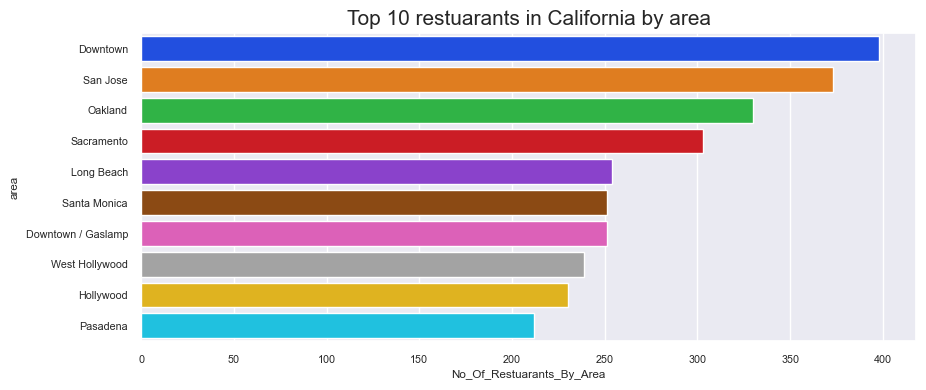

In [ ]:
plt.figure(figsize=(10,4))
sns.set(font_scale=0.7)
plt.title('Top 10 restuarants in California by area', fontsize=15)
sns.barplot(x = "No_Of_Restuarants_By_Area" , y = "area" ,palette = 'bright',data = No_Of_Restuarants_By_Area_in_desc[:10])

In [ ]:
#Restuarants in California by grouping multiple columns in Desc order

No_Of_Restuarants_Area_mf = df.groupby(['primary_cuisine','price_range_id','executive_chef_name','dining_style',"daily_reservation_count","rating_count","dress_code"],sort = True)["area"].size()
No_Of_Restuarants_Area_mf = No_Of_Restuarants_Area_mf.reset_index(name='No_Of_Restuarants_By_City')
No_Of_Restuarants_By_Area_mf_in_desc = No_Of_Restuarants_Area_mf.sort_values("No_Of_Restuarants_By_City",ascending=False)
No_Of_Restuarants_By_Area_mf_in_desc

primary_cuisine  price_range_id  \
0             Afternoon Tea               2   
1160                Italian               3   
1171                Italian               4   
1170                Italian               4   
1169                Italian               4   
...                     ...             ...   
578   Contemporary American               2   
577   Contemporary American               2   
576   Contemporary American               2   
575   Contemporary American               2   
1744               Yakitori               3   

                          executive_chef_name    dining_style  \
0                                Terrie Green  Casual Elegant   
1160                         Tommaso Barletta  Casual Elegant   
1171                        CHEF MARIO MARFIA  Casual Elegant   
1170                             Bruce Marder     Fine Dining   
1169                          Brendan Collins  Casual Elegant   
...                                       ...             ...   
578                              Tony Celeste  Elegant Dining   
577   Thomas Mulligan &amp; Francisco Alveraz   Casual Dining   
576                             Steven Smeets  Casual Elegant   
575                              Steve Wilson  Casual Elegant   
1744          Executive Chef Jeffrey Williams  Casual Elegant   

      daily_reservation_count  rating_count       dress_code  \
0                         3.0          46.0     Smart Casual   
1160                     22.0         229.0  Business Casual   
1171                     17.0         203.0     Casual Dress   
1170                     18.0         223.0     Casual Dress   
1169                     70.0         893.0     Smart Casual   
...                       ...           ...              ...   
578                       1.0          61.0     Casual Dress   
577                      27.0         167.0     Casual Dress   
576                      14.0         182.0     Smart Casual   
575                      37.0         362.0     Casual Dress   
1744                      3.0          12.0     Casual Dress   

      No_Of_Restuarants_By_City  
0                             1  
1160                          1  
1171                          1  
1170                          1  
1169                          1  
...                         ...  
578                           1  
577                           1  
576                           1  
575                           1  
1744                          1  

[1745 rows x 8 columns]

<AxesSubplot:title={'center':'Top 3 price_ranges of restuarants in California by area'}, xlabel='price_range_id', ylabel='count'>

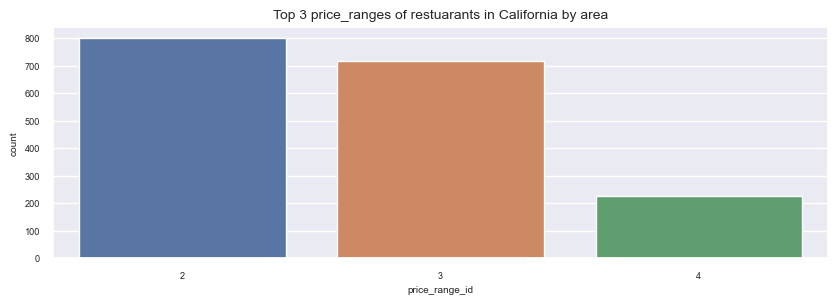

In [ ]:
plt.figure(figsize=(10,3))
sns.set(font_scale=0.6)
plt.title('Top 3 price_ranges of restuarants in California by area', fontsize=10)
sns.countplot(x ='price_range_id', data = No_Of_Restuarants_By_City_in_desc)

<AxesSubplot:title={'center':'Top 10 primary_cuisine of restuarants in California by area'}, xlabel='primary_cuisine', ylabel='count'>

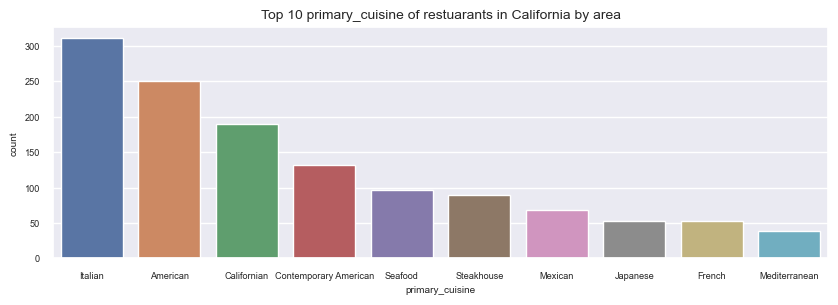

In [ ]:
plt.figure(figsize=(10,3))
sns.set(font_scale=0.6)
plt.title('Top 10 primary_cuisine of restuarants in California by area', fontsize=10)
sns.countplot(x ='primary_cuisine', data = No_Of_Restuarants_By_City_in_desc,order = No_Of_Restuarants_By_City_in_desc['primary_cuisine'].value_counts().index[:10])

<AxesSubplot:title={'center':'Top 10 dining_style of restuarants in California by area'}, xlabel='dining_style', ylabel='count'>

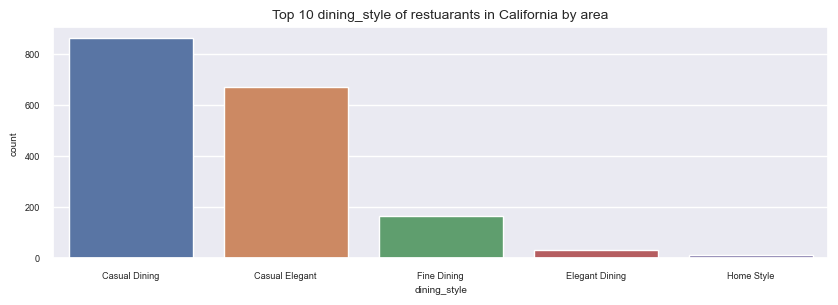

In [ ]:
plt.figure(figsize=(10,3))
sns.set(font_scale=0.6)
plt.title('Top 10 dining_style of restuarants in California by area', fontsize=10)
sns.countplot(x ='dining_style', data = No_Of_Restuarants_By_City_in_desc,order = No_Of_Restuarants_By_City_in_desc['dining_style'].value_counts().index[:10])

<AxesSubplot:title={'center':'Top 10  executive_chef_names of restuarants in California by area'}, xlabel='executive_chef_name', ylabel='count'>

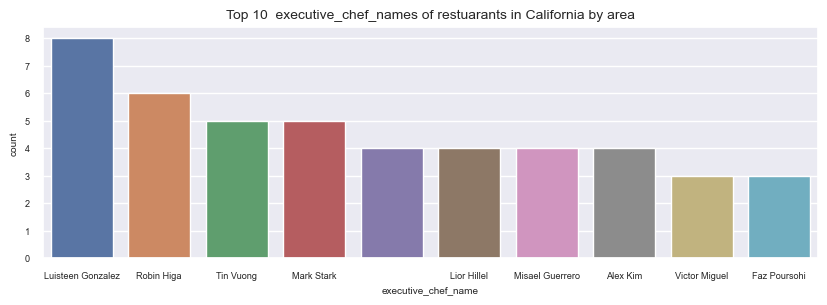

In [ ]:
plt.figure(figsize=(10,3))
sns.set(font_scale=0.6)
plt.title('Top 10  executive_chef_names of restuarants in California by area', fontsize=10)

sns.countplot(x ='executive_chef_name', data = No_Of_Restuarants_By_City_in_desc,order = No_Of_Restuarants_By_City_in_desc['executive_chef_name'].value_counts().index[:10])

<AxesSubplot:title={'center':'Top 10 daily_reservation_count of restuarants in California by area'}, xlabel='daily_reservation_count', ylabel='count'>

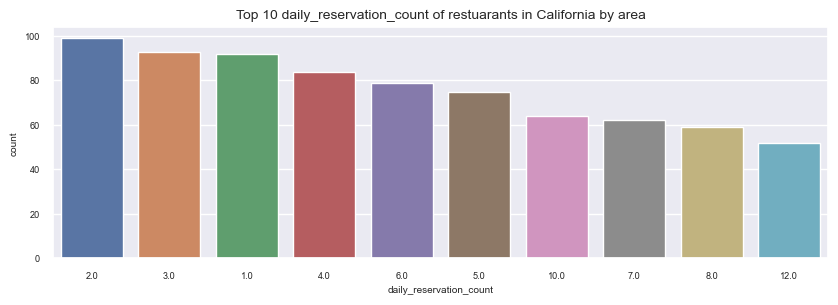

In [ ]:
plt.figure(figsize=(10,3))
sns.set(font_scale=0.6)
plt.title('Top 10 daily_reservation_count of restuarants in California by area', fontsize=10)

sns.countplot(x ='daily_reservation_count', data = No_Of_Restuarants_By_City_in_desc,order = No_Of_Restuarants_By_City_in_desc['daily_reservation_count'].value_counts().index[:10])

<AxesSubplot:title={'center':'Top dress codes of restuarants in California by area'}, xlabel='dress_code', ylabel='count'>

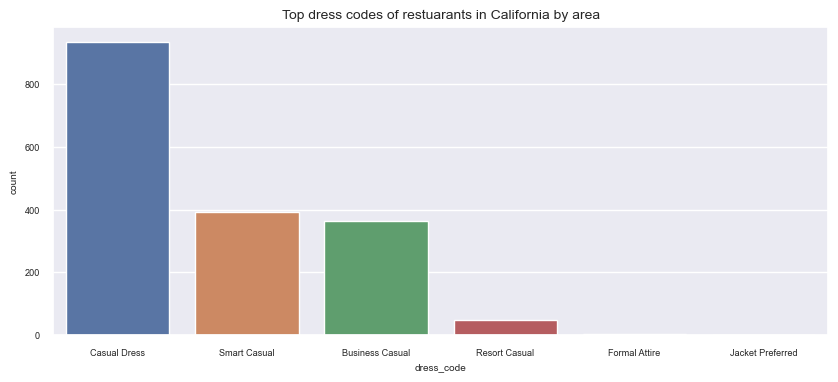

In [ ]:
plt.figure(figsize=(10,4))
sns.set(font_scale=0.6)
plt.title('Top dress codes of restuarants in California by area', fontsize=10)

sns.countplot(x ='dress_code', data = No_Of_Restuarants_By_City_in_desc,order = No_Of_Restuarants_By_City_in_desc['dress_code'].value_counts().index[:10])

<AxesSubplot:title={'center':'Top 10 rating_count of restuarants in California by area'}, xlabel='rating_count', ylabel='count'>

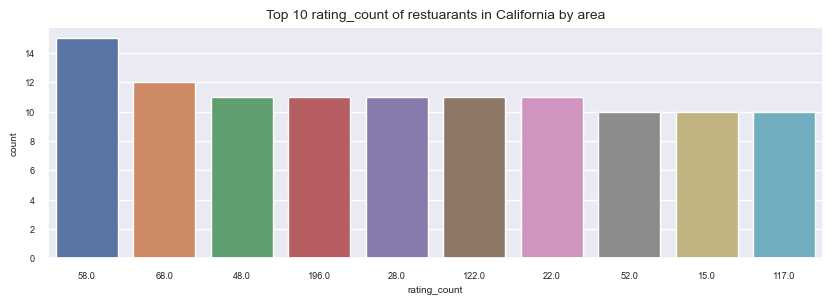

In [ ]:
plt.figure(figsize=(10,3))
sns.set(font_scale=0.6)
plt.title('Top 10 rating_count of restuarants in California by area', fontsize=10)

sns.countplot(x ='rating_count', data = No_Of_Restuarants_By_City_in_desc,order = No_Of_Restuarants_By_City_in_desc['rating_count'].value_counts().index[:10])

**From the above we can see that top 10 areas areas (Downtown,San Jose,Oakland,Sacremento,Long Beach,Santa Monica,DownTown/Gaslap,West Holllywood,Hollywood,Pasadena)are having the best restaurants in California.
Reason for conclusion:After clear observation of above plots in this 3.1.1 section.
* we can see that top price range is 2 means in these areas prie ranges are cheapest for the restuarants.
* Most of the people like primary cusines of italian,american,californian,contemprary american foods.
* Top 2 dining styles means mostly liked dining styles by customers is casula dining,casual elgnant. 
* Max rating count for each restuarant  15 for rating count of 58 similary for other rating counts also minimum 10.**


#### Michelin Approves

Which columns seem to play / not play a major factor in whether or not the restaurant has an award? Justify your options


In [ ]:
# simple dataframe to look at distribution of awards across california by most awarded titles
awards_df: pd.DataFrame = pd.json_normalize(df["awards"].dropna().explode()).rename(
    columns={"name": "award_name", "location": "award_location"}
)
awards_df["award_name"].value_counts().to_frame().head(10).rename(
    columns={"award_name": "award_count"}
).transpose()

Most Booked  Best Ambiance  Best Food  Best Overall  \
award_count          414            404        402           402   

             Best Service  Best Value  Special Occasion  Romantic  \
award_count           401         400               398       393   

             Fit for Foodies  Vibrant Bar Scene  
award_count              391                389

#### Principal Components

Which columns are highly correlated between each other and can be treated as redundant?


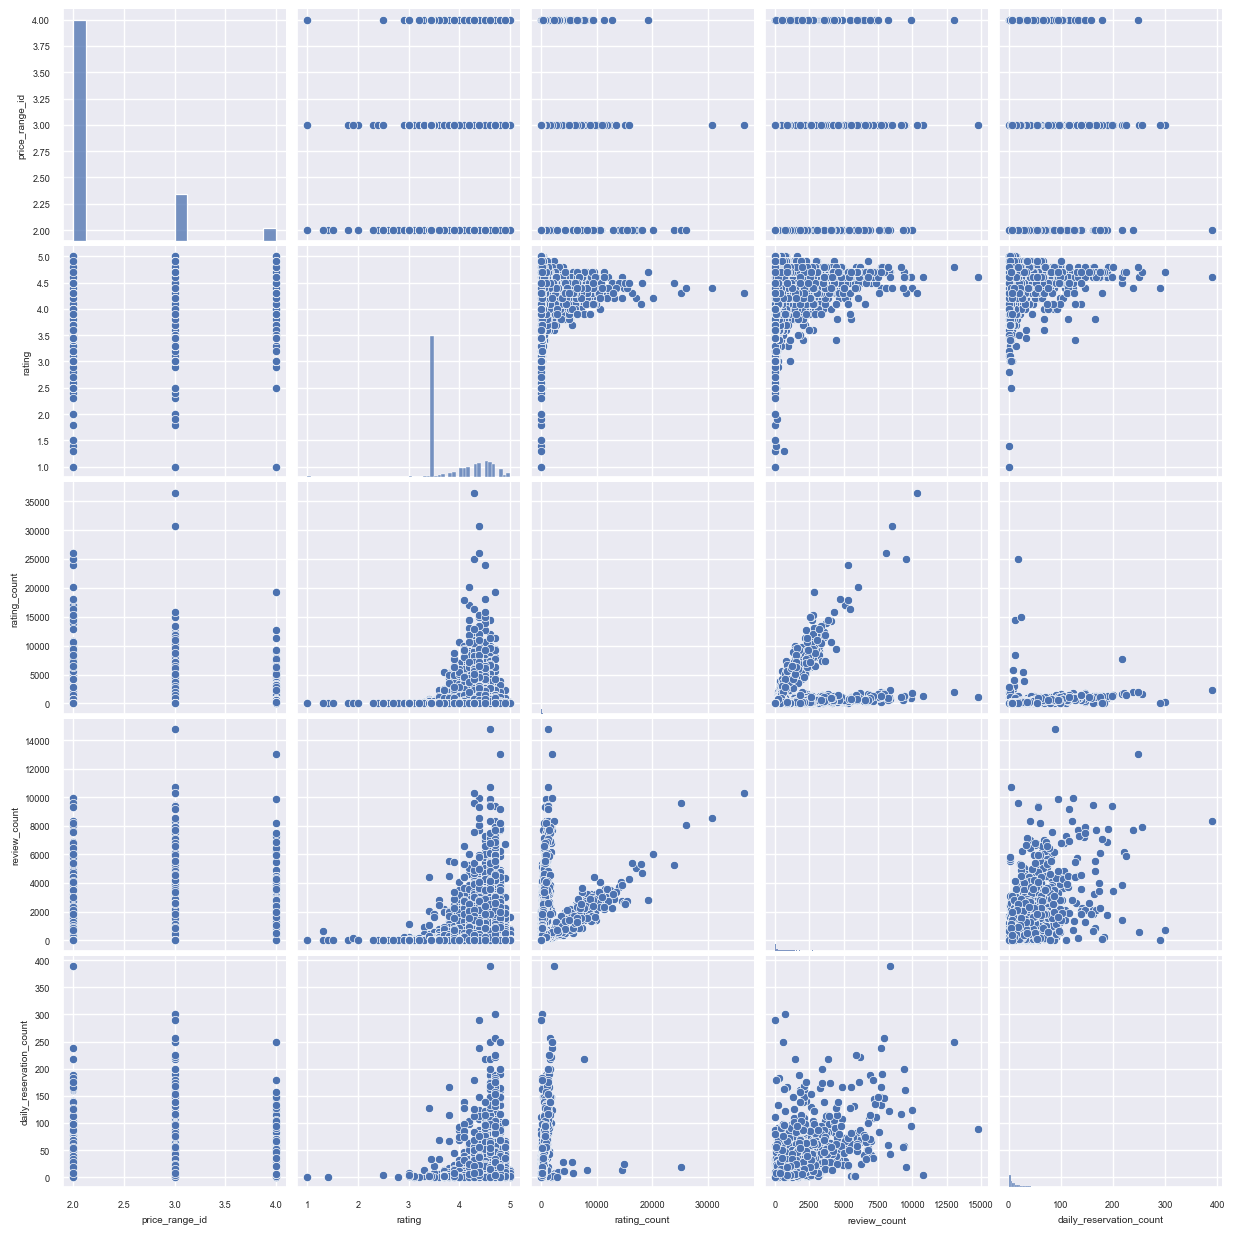

In [ ]:
# Creating a pairplot for already numeric columns in dataframe
pairplot_cols: list[str] = [
    "price_range_id",
    "rating",
    "rating_count",
    "review_count",
    "daily_reservation_count",
]
sns.pairplot(df[pairplot_cols])


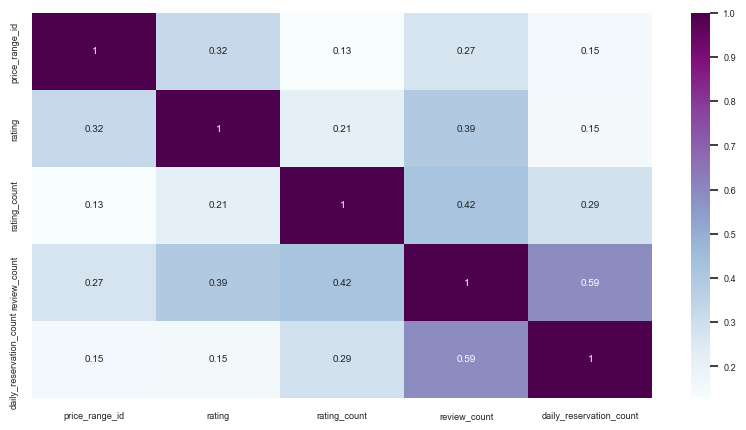

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df[pairplot_cols].corr(),annot = True,cmap="BuPu")
plt.show()

**After clear observations on pairplot and correlation matrix we can conclude that rating count,review count and daily reservation count has high positively correlated features in the dataset.**

In [ ]:
# ✏️ YOUR CODE HERE - may require encoding categorical string variables

#Define the columns we want to encode
pairplot_cat_cols: list[str] = ['country','subregion','city','brand_name','area',
 'cross_street','primary_cuisine','dining_style','executive_chef_name','parking_info',
 'dress_code','entertainment']

print(df[pairplot_cat_cols].isnull().sum())

df_cat_encoded = df[pairplot_cat_cols]
df_cat_encoded =  df_cat_encoded.fillna('Unknown')

print(df_cat_encoded.isnull().sum())

country                    0
subregion                  0
city                       0
brand_name                 0
area                       0
cross_street           11976
primary_cuisine            0
dining_style               0
executive_chef_name    13581
parking_info               0
dress_code                 0
entertainment          16963
dtype: int64
country                0
subregion              0
city                   0
brand_name             0
area                   0
cross_street           0
primary_cuisine        0
dining_style           0
executive_chef_name    0
parking_info           0
dress_code             0
entertainment          0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Create the function to fit and transform the label encoder
def label_encode_columns(df, columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le
    return df, encoders

In [ ]:
#Fit and transform the training dataset, returing both the new training dataset and the fitted encoders to use on the scoring dataset
df_cat_encoded, encoders = label_encode_columns(df=df_cat_encoded, columns=pairplot_cat_cols)

In [ ]:
df_cat_encoded.head(5)

country  subregion  city  brand_name  area  cross_street  primary_cuisine  \
0        0          0   372        8831   204          4527              161   
1        0          0   636        7227   472          4527                3   
2        0          0   499       14935   372          4527              148   
3        0          0   499        6267   372          4527               34   
4        0          0    78        3024    55          1411               90   

   dining_style  executive_chef_name  parking_info  dress_code  entertainment  
0             0                 3981             4           1           1141  
1             0                 3981             1           0           1141  
2             0                 3981             1           0           1141  
3             0                 3981             1           0           1141  
4             0                 2689             2           1           1141

<Figure size 3000x2000 with 0 Axes>

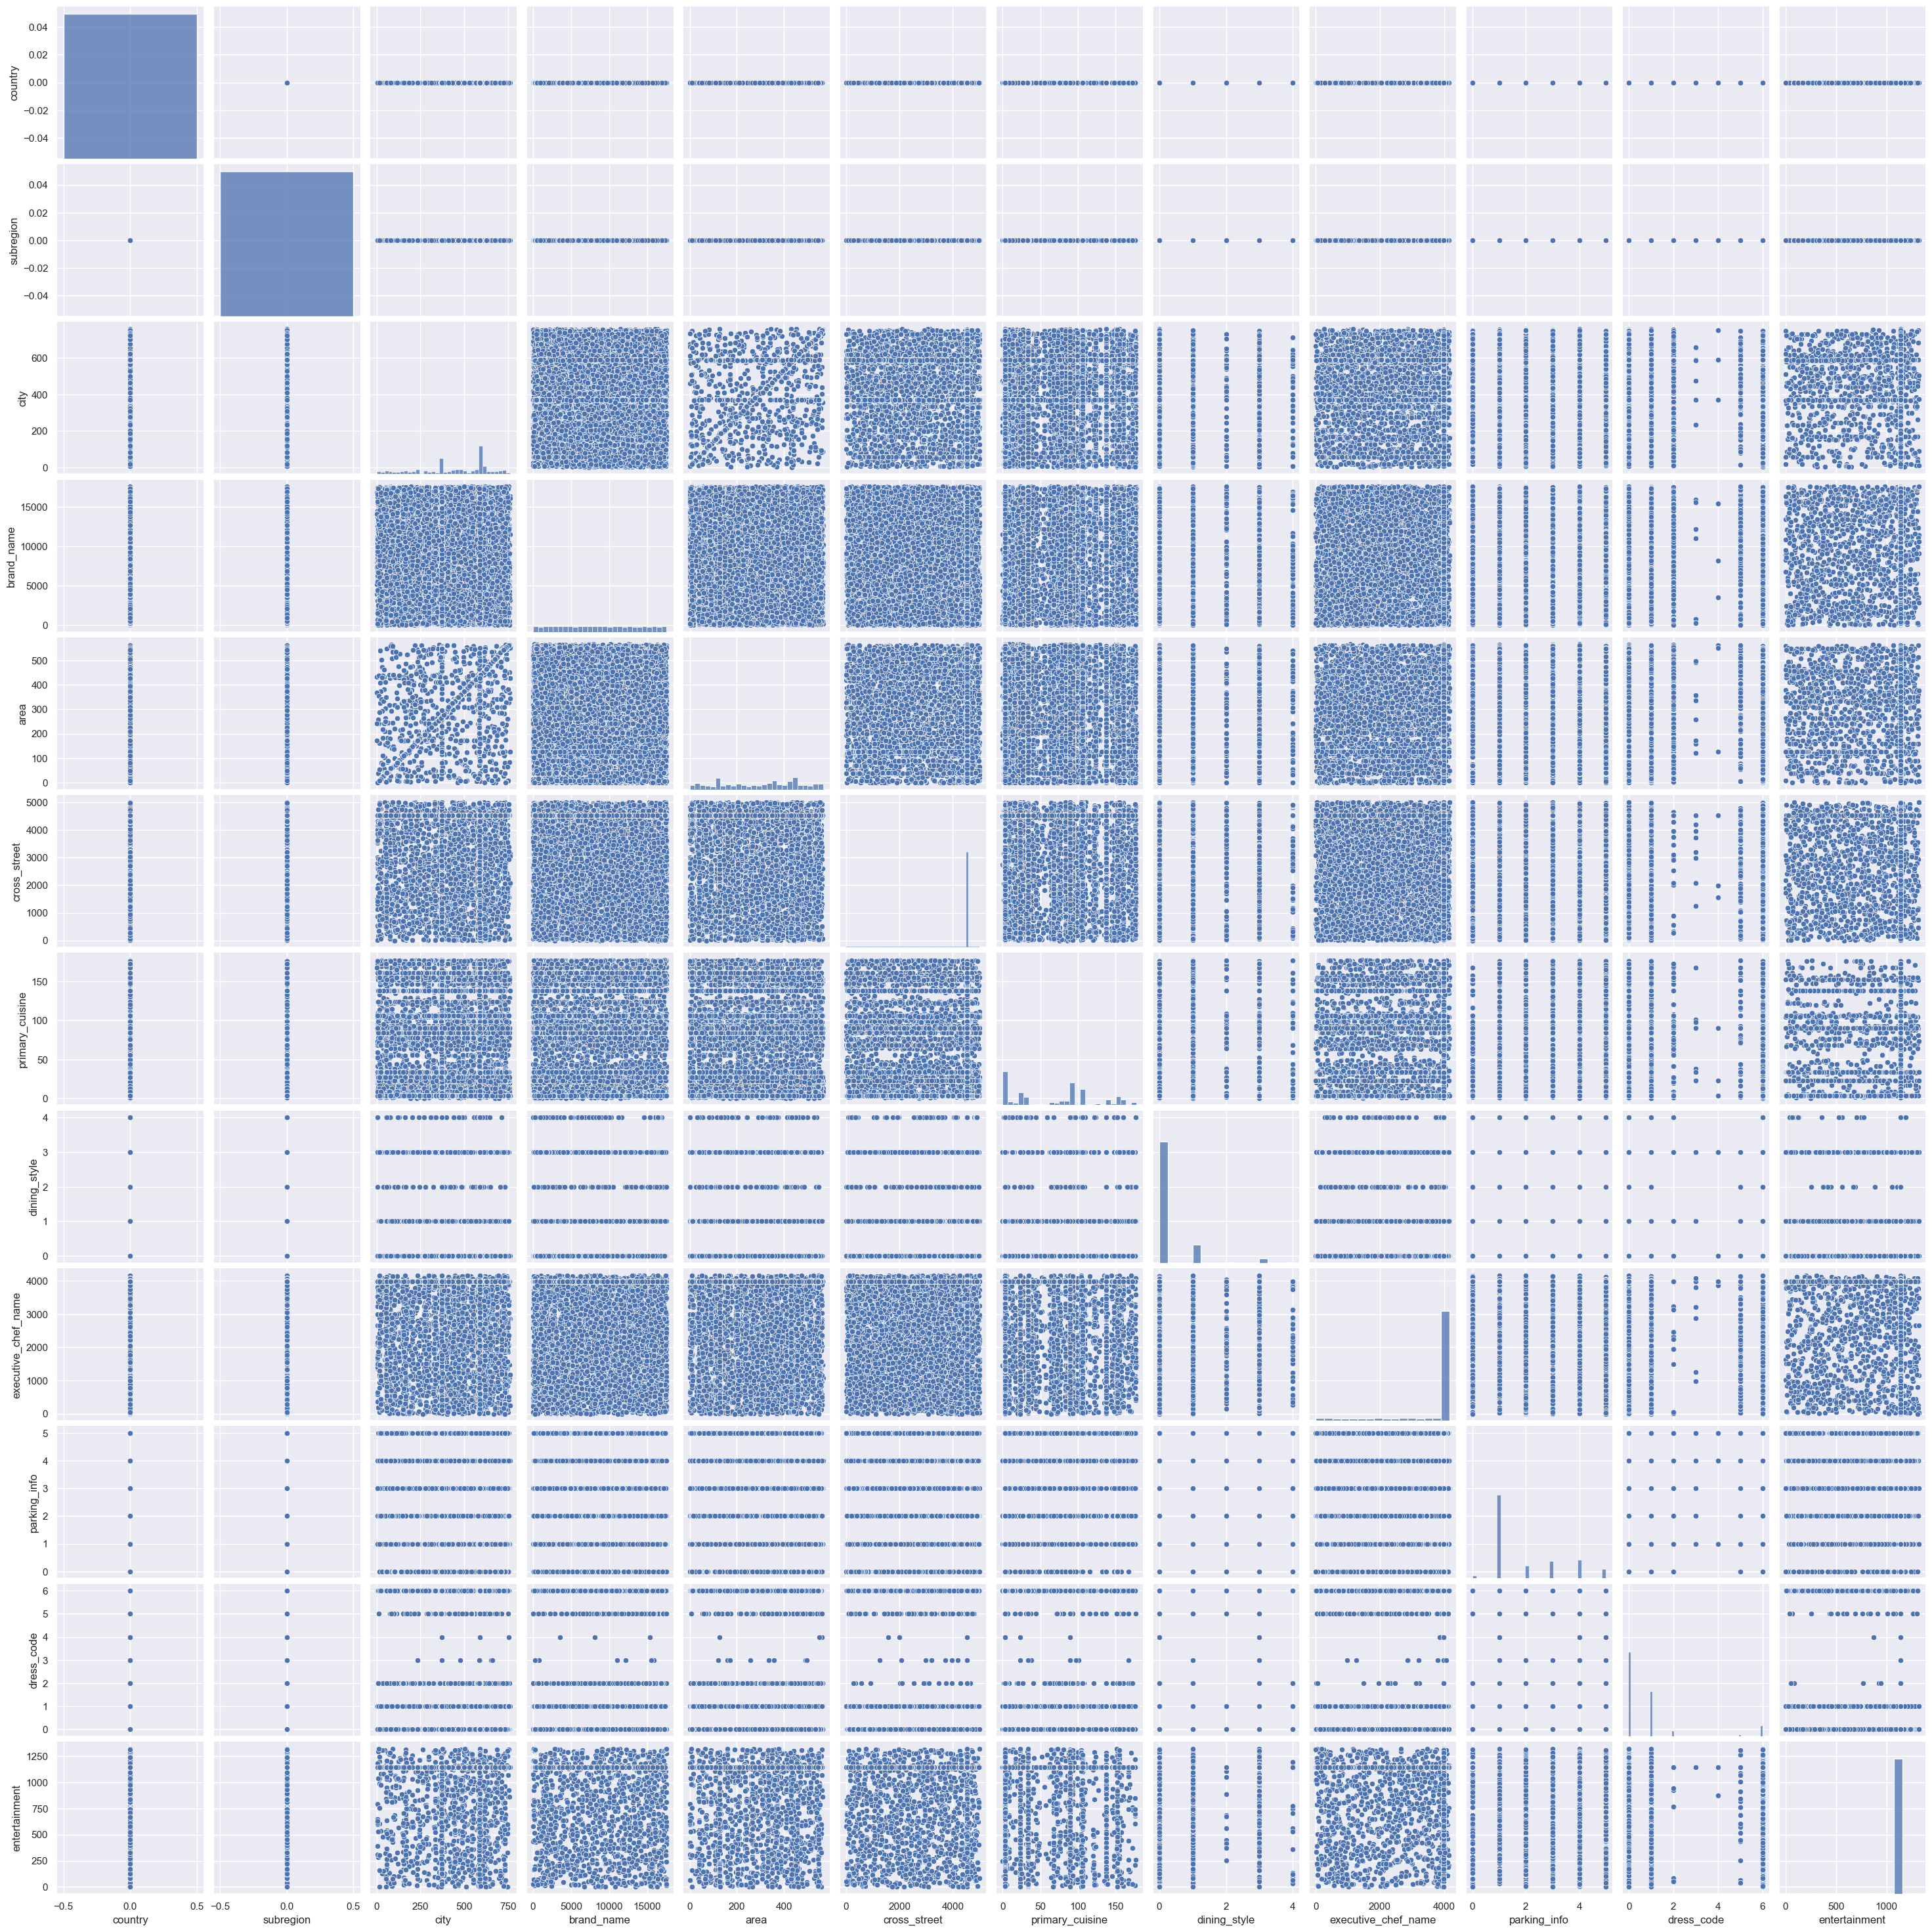

In [ ]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1)
sns.pairplot(df_cat_encoded)

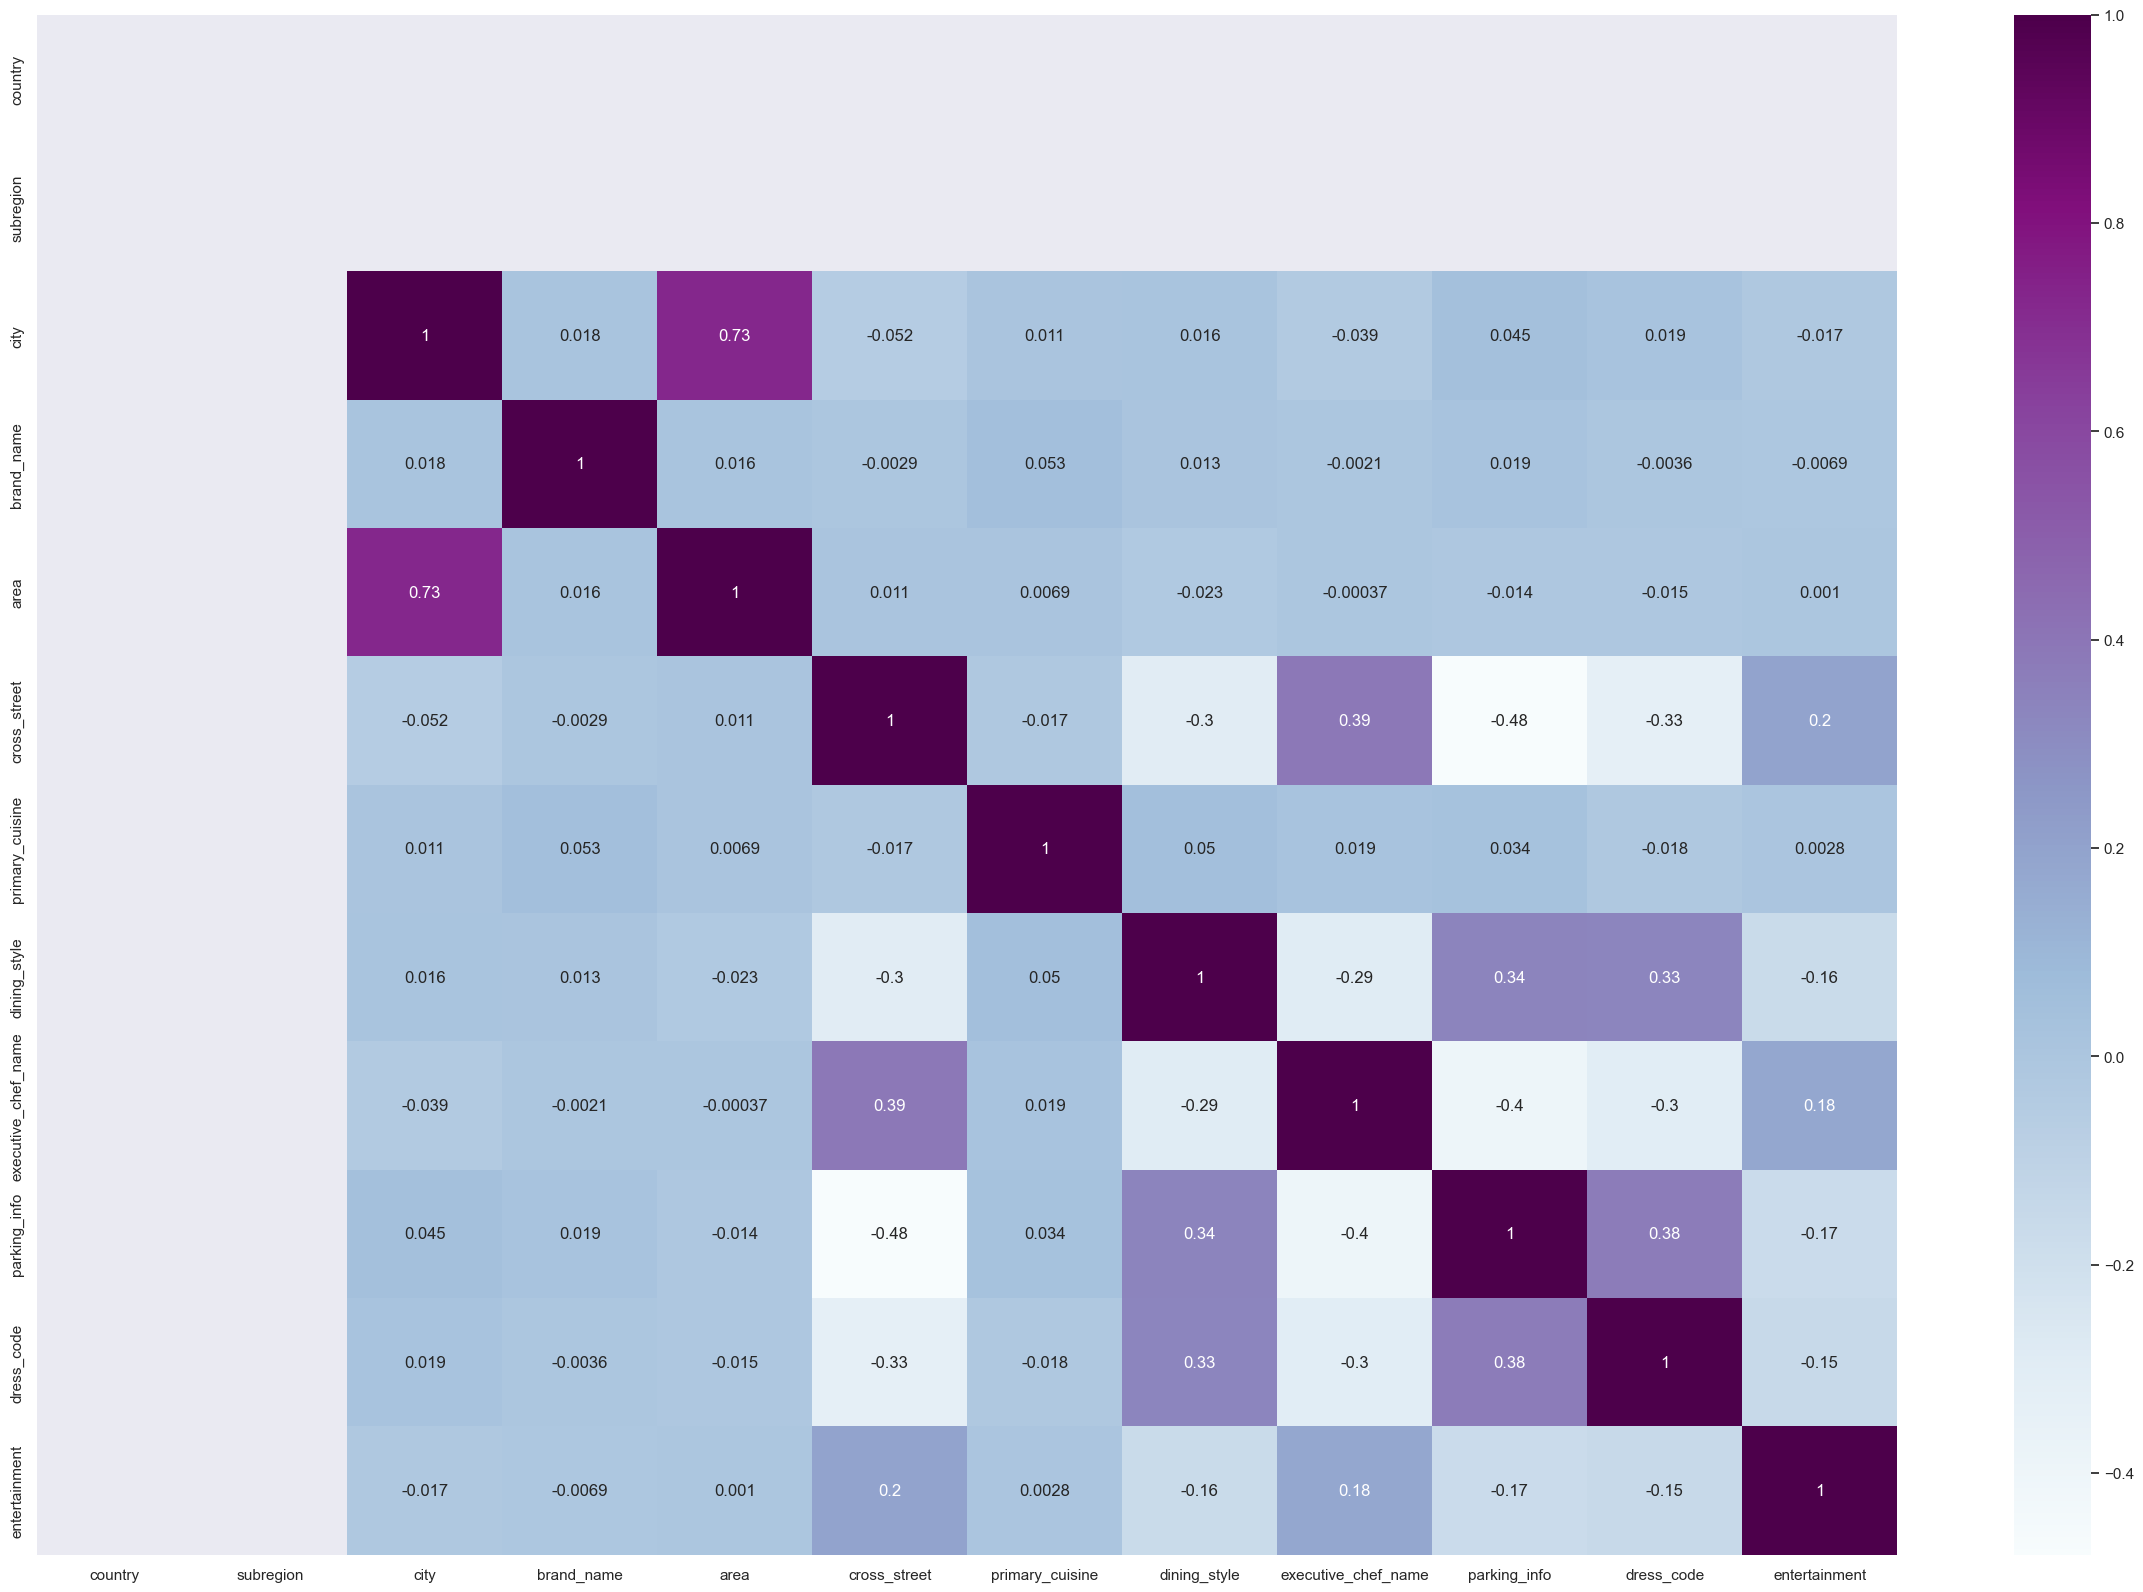

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df_cat_encoded.corr(),annot = True,cmap="BuPu")
plt.show()

**From the above correaltion matrix we can conclude that city and area are positively high correlated features other postively correlated features are:cross street,dining style,executive chef name,parking info and dress code features.**

---

Good job!

<img src="https://media.giphy.com/media/qLhxN7Rp3PI8E/giphy.gif" height="250px" width="250px" alt="legend of zelda">

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3692c72f-9e63-4373-add4-5d69bc6ce674' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>